# Healthcare Claims Cost Drivers & Risk Analysis

## Motivation
Understanding what drives healthcare costs is essential for designing effective cost-control and risk-reduction strategies.  
Rather than focusing solely on prediction, this analysis emphasizes statistical validation and interpretability to support business decision-making.


 ## Executive Summary

This project analyzes healthcare insurance claims data to identify key drivers of medical costs. 
Using statistical analysis and regression modeling, the study evaluates the impact of demographic 
and lifestyle factors on annual medical charges.

Key findings show that smoking status is the strongest independent cost driver, creating a large 
step-change in expected costs. Age contributes steady incremental increases, while BMI has a 
statistically significant but smaller effect. A multivariate regression model explains approximately 
75% of the variation in medical charges, highlighting the multifactor nature of healthcare costs.

The analysis focuses on interpretability and decision support rather than prediction, providing 
insights relevant for cost management and risk prioritization.


In [27]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy statsmodels jupyter


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels

In [29]:
# Load the dataset
df = pd.read_csv("data/insurance.csv")

# Quick sanity check
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


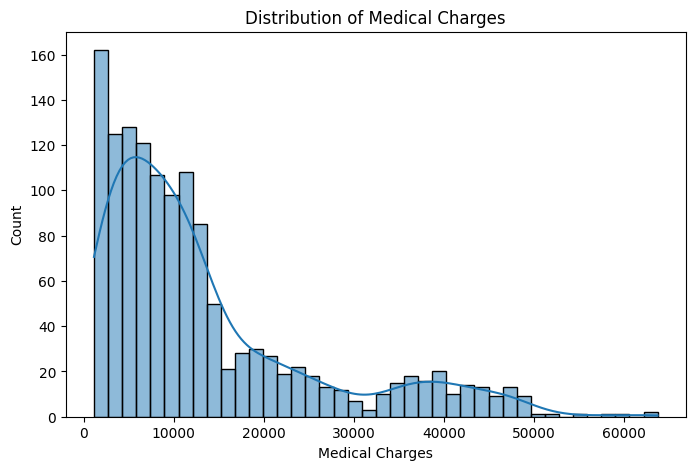

In [30]:

plt.figure(figsize=(8, 5))
sns.histplot(df["charges"], bins=40, kde=True)
plt.title("Distribution of Medical Charges")
plt.xlabel("Medical Charges")
plt.ylabel("Count")
plt.show()


## Cost Distribution
- Medical charges show a right-skewed distribution.
- A small subset of individuals account for disproportionately high costs.
- This suggests that averages alone may not fully represent cost behavior.


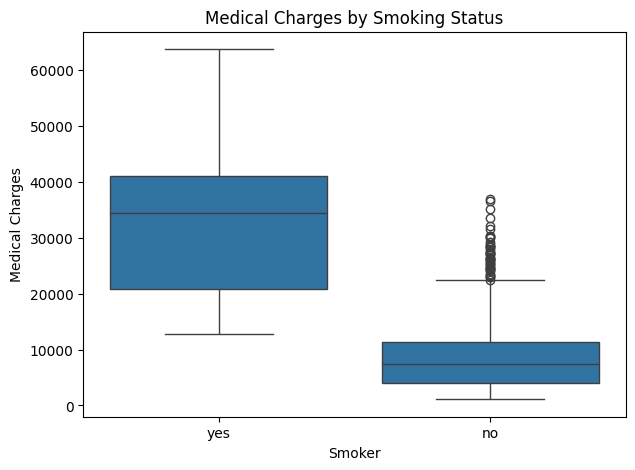

In [31]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Medical Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Medical Charges")
plt.show()


In [32]:
from scipy.stats import ttest_ind

# Split data into two groups
smokers = df[df["smoker"] == "yes"]["charges"]
non_smokers = df[df["smoker"] == "no"]["charges"]

# Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

t_stat, p_value


(np.float64(32.751887766341824), np.float64(5.88946444671698e-103))

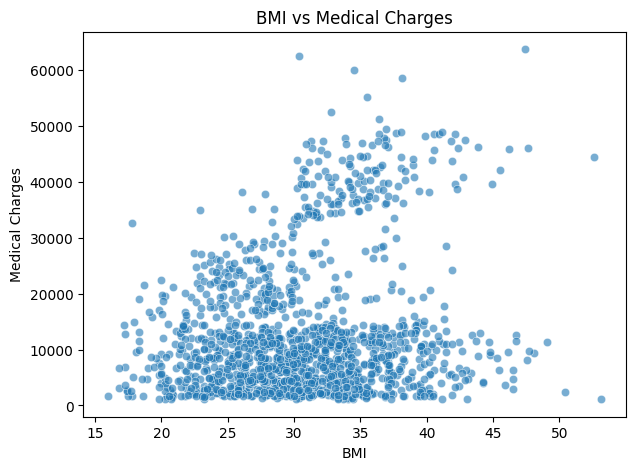

In [33]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="bmi", y="charges", data=df, alpha=0.6)
plt.title("BMI vs Medical Charges")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.show()


## BMI and Medical Charges
- Medical charges tend to increase with BMI, though the relationship is not strictly linear.
- Considerable variability exists at all BMI levels, indicating that BMI alone does not determine cost.
- This motivates quantitative assessment using correlation and regression.



In [34]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["bmi"], df["charges"])
corr, p_value


(np.float64(0.1983409688336289), np.float64(2.4590855351166946e-13))

## Correlation Analysis (BMI vs Charges)
- BMI shows a positive but moderate correlation with medical charges.
- The relationship is statistically significant but weaker compared to smoking status.
- This suggests BMI contributes to cost variation but is not the dominant driver.


In [35]:
import statsmodels.api as sm

X = df["bmi"]
y = df["charges"]

X = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           2.46e-13
Time:                        18:26:38   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression Analysis (BMI)
- Simple linear regression indicates a positive association between BMI and medical charges.
- The effect size suggests incremental cost increases with higher BMI.
- Low R-squared values indicate that BMI alone explains only a small portion of cost variability.


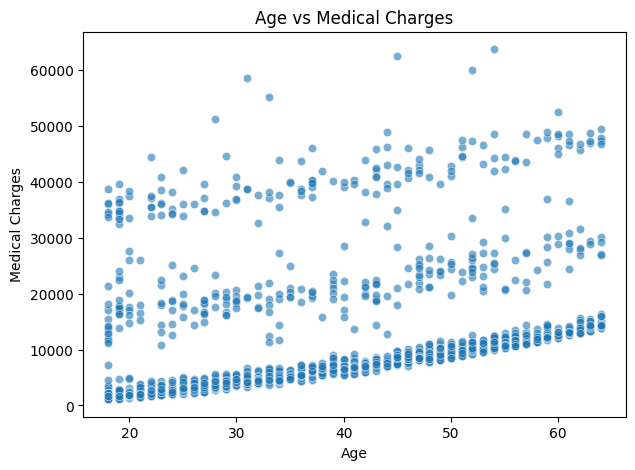

In [36]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="age", y="charges", data=df, alpha=0.6)
plt.title("Age vs Medical Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

In [38]:
df[["age", "bmi", "children"]].corr()


,age,bmi,children
age,1.000000,0.109272,0.042469
bmi,0.109272,1.000000,0.012759
children,0.042469,0.012759,1.000000


In [39]:
# Create a copy for modeling
df_model = df.copy()

# Encode smoker: yes = 1, no = 0
df_model["smoker_encoded"] = df_model["smoker"].map({"yes": 1, "no": 0})


In [40]:
import statsmodels.api as sm

X = df_model[["age", "bmi", "smoker_encoded"]]
y = df_model["charges"]

X = sm.add_constant(X)
multi_model = sm.OLS(y, X).fit()

multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:48:53   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age              259.5475     11.934     21.748      0.000     236.136     282.959
bmi              322.6151     27.487     11.737      0.000     268.692     376.538
smoker_encoded  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Limitations and Assumptions

- The dataset is observational; results indicate association, not causation.
- Clinical variables such as diagnoses, treatment types, and utilization frequency are not available.
- Costs are aggregated annually, masking short-term variability.
- The analysis assumes linear relationships for interpretability; non-linear effects may exist.
- Results may not generalize beyond the population represented in the dataset.
